# Shear Exercises

This is a notebook to exercise:

1) Multiple ellipticity definitions
2) Manipulation of shapes in WCS
3) Other stuff

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import galsim
import ngmix

### Definitions
Adapted from: [Wikipedia](https://en.wikipedia.org/wiki/Gravitational_lensing_formalism#Weak_lensing_observables):

These are the main definitions of ellipticity:

$\chi = \frac{1-q^2}{1+q^2}e^{2i\phi} = \frac{a^2-b^2}{a^2+b^2}e^{2i\phi}$  also called distortion, $e$, by **GalSim** {[G](https://galsim-developers.github.io/GalSim/_build/html/shear.html)} and **ngmix**.
 
$\epsilon = \frac{1-q}{1+q}e^{2i\phi} = \frac{a-b}{a+b}e^{2i\phi}$ also called reduced shear, or $g$ (for reasons that will be clear at the end of this section), by **ngmix** and **GalSim**. Called $e$ by **LensFit/CFHTLenS** {[L](http://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/en/community/CFHTLens/README_catalogs_release_2018-01-31.txt)} and **IM3SHAPE** {[J](https://arxiv.org/abs/1302.0183)}.

or:

$\chi = \{\left|\chi\right|\cos 2\phi, \left|\chi\right|\sin 2\phi\}$

$\epsilon = \{\left|\epsilon\right|\cos 2\phi, \left|\epsilon\right| \sin 2\phi\}$

Unweighted Moments:

$q_{xx} = \frac{\sum (x-\bar{x})^2 I(x,y)}{\sum I(x,y)}$

$q_{yy} = \frac{\sum (y-\bar{y})^2 I(x,y)}{\sum I(x,y)}$

$q_{xy} = \frac{\sum (x-\bar{x})(y-\bar{y}) I(x,y)}{\sum I(x,y)}$


When using moments, ellipticity estimates will be:

$\chi = \frac{q_{xx}-q_{yy} + 2 i q_{xy}}{q_{xx}+q_{yy}}$ <- gaussian moments from **ngmix** returns these by default.


$\epsilon = \frac{q_{xx}-q_{yy} + 2 i q_{xy}}{q_{xx}+q_{yy} + 2\sqrt{q_{xx}q_{yy}-q_{xy}^2}}$ <- **LensFit** products are not moments, but should be equivalent to these.

From this, we have $a$ and $b$ as:


$a^2 = \frac{q_{xx}+q_{yy} + \sqrt{(q_{xx}-q_{yy})^2 + 4q_{xy}^2}}{2}$

$b^2 = \frac{q_{xx}+q_{yy} - \sqrt{(q_{xx}-q_{yy})^2 + 4q_{xy}^2}}{2}$


And $\theta$:

$\tan 2\theta = \frac{2q_{xy}}{q_{xx}-q_{yy}}$


**Finally, and very important:**

Ellipticity definitions affect the equation for the estimation of shears:

If $\chi_s$ and $\epsilon_s$ are measurements of the intrinsic shape of the galaxy, then shearing by $\gamma$ will result in:

$\chi = \frac{\chi_s+2g+g^2\chi_s^*}{1+|g|^2 + 2\mathrm{Re}(g\chi_s^*)}$

$\epsilon = \frac{\epsilon_s+g}{1+g^*\epsilon_s}$

In the weak lensing limit, $\gamma \ll 1$ and $\kappa \ll 1$, so

$\chi \approx \chi_s+2g \approx \chi_s+2\gamma$

$\epsilon \approx \epsilon_s+g \approx \epsilon_s+\gamma$

When averaging shapes to estimate the gravitational shear in a patch of the sky, we then have:

$\langle \chi \rangle = 2\langle \gamma \rangle $, and 

$\langle \epsilon \rangle = \langle g \rangle = \langle \gamma \rangle$.

So, when using "$e$" by ngmix/GalSim, we expect it to average out to **TWO** times the shear.





### Testing:

What does it look like when we mistake e for g?

(-1.0, 1.0)

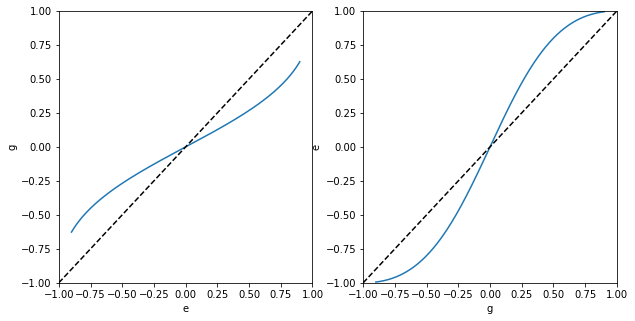

In [67]:
figure(figsize=(10,5))
subplot(121)
e = linspace(-.9,.9,1000)
g = [galsim.Shear(e1=e1,e2=0).g1 for e1 in e]
plot(e,g)
plot([-1,1],[-1,1],'k--')
xlabel('e')
ylabel('g')
xlim(-1,1)
ylim(-1,1)
subplot(122)
g = linspace(-.9,.9,1000)
e = [galsim.Shear(g1=g1,g2=0).e1 for g1 in g]
plot(g,e)
plot([-1,1],[-1,1],'k--')
xlabel('g')
ylabel('e')
xlim(-1,1)
ylim(-1,1)